### BRAUX-GUILLIN Valentin, ASSEMAT Quentin <br/> École Polytechnique, March 2021

# Nash Equilibrium in a Discrete Colonel Blotto Game

## 1 Introduction and Definitions

### 1.1 Introduction

The Colonel Blotto game is a famous resource allocation game. It was first introduced by Borel in 1921 and spurred a lot of research since then. In the Colonel Blotto game, two players allocate a finite budget of resources to several battlefields and each battlefield is won by the player who allocated more resources to it. Each player seeks to maximize the gains from the battlefields they win. This game has been used to model a variety of strategic resource allocation problems such as allocation of advertisement expenditures or lobbying resources, R&D contests, election and political contests, or security resource allocation.

In this project, we consider a discrete version of the Colonel Blotto game where resources are indivisible troops, which imposes that allocations must be integer. The game is therefore a finite game (i.e., each player has a finite number of possible strategies) and it is known since 1951 that such games always have a Nash equilibrium. Moreover, the Colonel Blotto game is a zero-sum game (at least in some formulations) and it is known that for such games, finding a Nash equilibrium is equivalent to the minmax property, which can be expressed by a linear program and solved in time polynomial in the size of the strategy space. The Colonel Blotto game, however, has a strategy space which is itself of size exponential in the natural parameters of the game. The goal of the project is to explore algorithms to compute best-response and Nash equilibrium strategies of this game, from naive solutions to refined solutions that achieve polynomial complexity in the natural parameters of the game.

### 1.2 Definitions

Game: two players $A$ and $B$, $n$ battlefields with values $v_1, ..., v_n$, budgets of troops $X \in \mathbb{N}$ and $Y \in \mathbb{N}$ respectively for $A$ and $B$.

#### Pure strategies

A pure strategy $x$ of $A$ is an allocation of the $X$ troops to the $n$ battlefields: $x \in \mathbb{N}^n$ and $\sum\limits_{i=1}^{n} x_i = X$.

Set of pure strategies of $A$ is $\mathcal{X} = \{x \in \mathbb{N}^n | \sum\limits_{i=1}^{n} x_i = X\}$, set of pure strategies of $B$ is $\mathcal{Y} = \{y \in \mathbb{N}^n | \sum\limits_{i=1}^{n} y_i = Y\}$.

Payoff of $A$ in battlefield $i$ is:
\begin{equation*}
u_i(x_i, y_i) = \begin{cases}
v_i \quad &\text{if} \quad x_i > y_i \\
-v_i \quad &\text{if} \quad x_i < y_i \\
0 \quad &\text{if} \quad x_i = y_i
\end{cases}
\end{equation*}

Payoff of $B$ in battlefield $i$ is $−u_i(x_i, y_i)$.

Total payoff of $A$ is $U(x, y) = \sum\limits_{i=1}^{n} u_i(x_i, y_i)$, total payoff of $B$ is $−U(x, y)$.

#### Mixed strategies

A mixed strategy $p$ of $A$ is a probability distribution over the set of pure strategies : $p_x$ is the probability assigned to $x \in \mathcal{X}$.

Set of mixed strategies of $A$ is $\mathcal{P} = \Delta(\mathcal{X})$ (set of probability distributions over $\mathcal{X}$), set of mixed strategies of $B$ is $\mathcal{Q} = \Delta(\mathcal{Y})$.

Total payoff of $A$ is $U(p, q) = \sum\limits_{x \in \mathcal{X}} \sum\limits_{y \in \mathcal{Y}} p_x q_y U(x, y)$, total payoff of $B$ is $−U(p, q)$.

## 2 Best responses in the Colonel Blotto game

##### Question 0:

To count the number of pure strategies of $A$, we can represent the process of choosing a pure strategy as follows: for each troop that we put in the first battlefield, we draw a dot. Then we draw a vertical bar, and for each troop we put in the second battlefield, we draw a dot... Until the last battlefield is done.  
In the end, there are as many possibilities as there are ways to arrange the $X$ dots and the $n-1$ bars, which is $\binom{X+n-1}{X}$.

Hence player $A$ has $|\mathcal{X}| = \binom{X+n-1}{X}$ pure strategies, and player $B$ has $|\mathcal{Y}| = \binom{Y+n-1}{Y}$ pure strategies.

Let $(p,q)$ be a profile of mixed strategies.  
The payoff of $A$ is:

\begin{align*}
U(p, q) = \sum\limits_{x \in \mathcal{X}} \sum\limits_{y \in \mathcal{Y}} p_x q_y U(x, y) &= \sum\limits_{i = 1}^n  \sum\limits_{x \in \mathcal{X}} \sum\limits_{y \in \mathcal{Y}} p_x q_y u_i(x_i, y_i) \\
&= \sum\limits_{i = 1}^n  \sum\limits_{x \in \mathcal{X}} \sum\limits_{y \in \mathcal{Y}} p_x q_y u_i(x_i, y_i) \\
&= \sum\limits_{i = 1}^n  \sum_{\substack{x \in \mathcal{X} \\ x_i = \tilde{x_i}}} \sum_{\substack{y \in \mathcal{Y} \\ y_i = \tilde{y_i}}} p_x q_y u_i(\tilde{x_i}, \tilde{y_i}) \\
&= \sum\limits_{i = 1}^n  \Big(\sum_{\substack{x \in \mathcal{X} \\ x_i = \tilde{x_i}}} p_x \Big) \Big( \sum_{\substack{y \in \mathcal{Y} \\ y_i = \tilde{y_i}}} q_y \Big) u_i(\tilde{x_i}, \tilde{y_i}) \\
&= \sum\limits_{i = 1}^n  p^i_\tilde{x_i} q^i_\tilde{y_i} u_i(\tilde{x_i}, \tilde{y_i})
\end{align*}

Where $p^i, q^i$ are the marginal distributions of troops allocated to the battlefield $i$.  
Hence the payoffs only depend on the marginal allocation of each player on each battlefield.

Before diving further into the problem, we will need to have arrays that contain the pure strategies of $A$ and $B$, arranged in a known order.  
The next function constructs the array of pure strategies for a budget of $Z$ troops and $n$ battlefields, in the lexicographic order.

In [1]:
# Constructing the array of pure strategies for Z troops and n battlefields, in the lexicographic order

def construct(Z,n):
    if (n==1):
        return [[Z]]
    else:
        C = []
        for i in range (0,Z+1):
            Ci = construct(Z-i, n-1) # Allocate i troops to the first battlefield and recurse with the rest
            for c in Ci:
                C += [[i] + c]
    return C

construct(2,3)

[[0, 0, 2], [0, 1, 1], [0, 2, 0], [1, 0, 1], [1, 1, 0], [2, 0, 0]]

### 2.1 Best response through brute force

##### Question 1:

Let $q$ be a mixed strategy of $B$. The payoff of $A$ with a mixed strategy $p$ is $U(p, q) = \sum\limits_{x \in \mathcal{X}} p_x \sum\limits_{y \in \mathcal{Y}} q_y U(x, y)$.

$\psi : x \mapsto \sum\limits_{y \in \mathcal{Y}} q_y U(x, y)$ is a function of $x$ for $x \in \mathcal{X}$, and $\mathcal{X}$ is finite, thus $\psi$ has a maximum $\psi^*$ which is reached for $x^*$.

Then for any mixed strategy $p$, we have:

\begin{align*}
p_x \sum\limits_{y \in \mathcal{Y}} q_y U(x, y) &= p_x \psi(x)\\
                                                &\leq p_x \psi(x^*)\\
                                                &= p_x \sum\limits_{y \in \mathcal{Y}} q_y U(x^*, y)
\end{align*}

Then by summing on all $x \in \mathcal{X}$, we get $U(p, q) = \sum\limits_{x \in \mathcal{X}} p_x \sum\limits_{y \in \mathcal{Y}} q_y U(x, y) \leq \sum\limits_{x \in \mathcal{X}} p_x \sum\limits_{y \in \mathcal{Y}} q_y U(x^*, y) = U(x^*, q) \sum\limits_{x \in \mathcal{X}} p_x = U(x^*, q)$.

Thus $x^*$ is a best response.  
Hence there always exists a best response that is a pure strategy.

##### Question 2:

In this first brute-force algorithm, we just try all the pure strategies of $A$ and chose the one that gives maximum payoff over the mixed strategy $q$ of $B$.

---
**Algorithm 1:** BruteForce($q$): A brute-force algorithm that computes a best response for $A$ to the mixed strategy $q$ of $B$. 

---
**Input:** A mixed strategy $q$ of $B$.  
**Output:** A best response for $A$ that is a pure strategy.  
Let $x_0$ be a pure strategy of $A$;  
Compute $u_0 = U(x_0, q) = \sum\limits_{y \in \mathcal{Y}} q_y U(x_0, y)$;  
$(\text{arg},\text{max}) \leftarrow (x_0,u_0)$;  
**for** $x \in \mathcal{X}$  **do**  
> Compute $u = U(x, q) = \sum\limits_{y \in \mathcal{Y}} q_y U(x, y)$;  
  **if** $u > \text{max}$ **then**  
  >> $(\text{arg},\text{max}) \leftarrow (x,u)$;  
  
**return** $\text{arg}$;

We compute the value of $U(x, q)$ for $x \in \mathcal{X}$ with $q \in \Delta(\mathcal{Y})$.  
This is done by computing $U(x, y)$ for each $y \in \mathcal{Y}$ (each one takes $O(n)$ operations) and summing the products $q_y U(x, y)$, resulting in $O(n|\mathcal{Y}|)$ operations. All other operations take constant time, and we compute the previous value once at the beginning and then one time per loop, so $|\mathcal{X}|+1$ times in total.

#### Hence the resulting time complexity of BruteForce is $O(n|\mathcal{X}||\mathcal{Y}|)$.

For the implementation, we suppose that the array $Q$ which represents the mixed strategy $q$ of $B$ is given in the lexicographic order.

In [2]:
# Q is the array that describes the distribution of B
# n is the number of battlefields
# V is the array that contains the values of the n battlefields
# X, Y are the budgets of troops

# We first define the function that gives the payoff of a battlefield for A

def u(i,xi,yi,V):
    if (xi > yi):
        return V[i]
    elif (xi < yi):
        return -V[i]
    else:
        return 0

def bruteForce(Q,n,X,Y,V):
    stratX = construct(X,n)
    stratY = construct(Y,n)
    
    x0 = stratX[0]
    U_0 = 0
    for i in range (0,len(Q)):
        res = 0
        y = stratY[i]
        for j in range (0,n):
            res += u(j,x0[j],y[j],V)
        U_0 += Q[i]*res
    Z = [x0,U_0]
    
    for x in stratX:
        U = 0
        for i in range (0,len(Q)):
            res = 0
            y = stratY[i]
            for j in range (0,n):
                res += u(j,x[j],y[j],V)
            U += Q[i]*res
        if U > Z[1]:
            Z = [x,U]
    
    return Z[0]

### 2.2 Best response through dynamic programming

##### Question 3:

The problem can be solved in a more efficient way by considering that computing the payoffs of the $|\mathcal{X}|$ pure strategies for $n$ battlefield can be done by computing the value of the payoff on each battlefield and then summing them.

We can rewrite this as follows: $\text{max} \{\sum\limits_{y \in \mathcal{Y}} q_y U(x, y) ~|~ x \in \mathcal{X}\} = \text{max} \{\sum\limits_{i = 1}^n \sum\limits_{y \in \mathcal{Y}} q_y u_i(xi, yi) ~|~ (x_1,...,x_n) \in \{0,...,X\}^n \text{ and }  \sum\limits_{i = 1}^n x_i = X\}$.

Instead of naively computing the big sum $|\mathcal{X}|$ times, we will only compute it $n(X+1)$ times and then compare the $|\mathcal{X}|$ possible values computed with the already computed sums.

---
**Algorithm 2:** NaiveDP($q$): A dynamic programming algorithm that computes a best response for $A$ to the mixed strategy $q$ of $B$. 

---
**Input:** A mixed strategy $q$ of $B$.  
**Output:** A best response for $A$ that is a pure strategy.  
Let $T$ be an array containing $n$ empty arrays of length $X+1$;  
**for** $i \in \{1,...,n\}$  **do**  
> **for** $x_i \in \{0,...,X\}$ **do**   
  >> Compute $u = \sum\limits_{y \in \mathcal{Y}} q_y u_i(x_i, y_i)$;  
  $T[i][x_i] \leftarrow u$

Let $x_0$ be a pure strategy of $A$;  
Compute $u_0 = U(x_0, q) = \sum\limits_{i = 1}^n T[i][{x_0}_i]$;  
Let $(\text{arg},\text{max})$ be $(x_0,u_0)$;  
**for** $x \in \mathcal{X}$  **do**  
> Compute $u = U(x, q) = \sum\limits_{i = 1}^n T[i][x_i]$;  
  **if** $u > \text{max}$ **then**  
  >> $(\text{arg},\text{max}) \leftarrow (x,u)$;

**return** $\text{arg}$;

First, we construct the array $T$, computing the value of $\sum\limits_{y \in \mathcal{Y}} q_y u_i(x_i, y_i)$ for all $i \in \{1,...,n\}$ and $x_i \in \{0,...,X\}$ with $q \in \Delta(\mathcal{Y})$.  
This is done by computing $u_i(x_i, y_i)$ for each $y \in \mathcal{Y}$ (constant time operation) and summing the products $q_y u_i(x_i, y_i)$, resulting in $O(|\mathcal{Y}|)$ operations.  
We compute the previous value in two nested loops, so $n(X+1)$ times in total.

Then, we compute the value of $U(x,q)$ for all $x \in \mathcal{X}$ with $q \in \Delta(\mathcal{Y})$.  
This is done by summing the $T[i][x_i]$ for $i \in \{1,...,n\}$, resulting in $O(n)$ operations. All other operations take constant time, and we compute the previous value once at the beginning and then one time per loop, so $|\mathcal{X}|+1$ times in total.

#### Hence the resulting time complexity of NaiveDP is $O(nX|\mathcal{Y}|+n|\mathcal{X}|)$.

This is already better than what we had with the brute-force approach, but even though there is an array $T$ it does not feel like true dynamic programming... It was indeed our first idea, and it felt like it was not possible to get a better complexity with a true dynamic programming approach because we would still need to compute all the $T[i][x_i]$ in $O(|\mathcal{Y}|)$ operations.

But then we had another idea that could reduce the other term of the complexity. After computing the array $T$, we have access to the payoff of $A$ on battlefield $i$ when it contains $x_i$ troops, and it can help us finding a recurrence with subproblems.

Let $P$ be an array containing $n+1$ arrays of length $X+1$, with $P[i][j]$ being the maximum payoff that $A$ can get on the $i$ first battlefields with $j$ troops.  
We have the following recurrence:

\begin{align*}
&P[0][j] &&= 0 ~\forall~ j \in \{0,...,X\} \\
&P[i+1][j] &&= \text{max } \{ P[i][j-k] + T[i+1][k] ~|~ k \in \{0,...,j\}\} \\
\end{align*}

That way, we can compute $P[n][X]$, the maximum payoff of $A$, via a recurrence which will be less costly than our previous $O(n|\mathcal{X}|)$ needed to compare all the pure strategies.

Since our output is the best pure strategy, we will also need to keep track of the way we achieved the maximum payoff. For this we also create an array $K$ containing $n$ arrays of length $X+1$, with $K[i][j]$ being the maximum argmax in the recurrence (i. e. how many troops to put on the last battlefield, with the constraint of using all troops). Then we can obtain the best response iteratively.

---
**Algorithm 3:** TrueDP($q$): A dynamic programming algorithm that computes a best response for $A$ to the mixed strategy $q$ of $B$. 

---
**Input:** A mixed strategy $q$ of $B$.  
**Output:** A best response for $A$ that is a pure strategy.  
Let $T$ be an array containing $n$ empty arrays of length $X+1$;  
**for** $i \in \{1,...,n\}$  **do**  
> **for** $x_i \in \{0,...,X\}$ **do**   
  >> Compute $u = \sum\limits_{y \in \mathcal{Y}} q_y u_i(x_i, y_i)$;  
  $T[i][x_i] \leftarrow u$

Let $K$ be an array containing $n$ empty arrays of length $X+1$;  
Let $P$ be an array containing $n+1$ empty arrays of length $X+1$;  
**for** $j \in \{0,...,X\}$ **do**  
> $P[0][j] \leftarrow 0$;  

**for** $i \in \{1,...,n\}$ **do**  
> $P[i][0] \leftarrow P[i-1][0]+T[i][0]$;

**for** $i \in \{0,...,n-1\}$ **do**  
 > **for** $j \in \{1,...,X\}$ **do**
   >> $P[i+1][j] \leftarrow \text{max} \{ P[i][j-k] + T[i+1][k] ~|~ k \in \{0,...,j\}\}$;
   >> $K[i+1][j] \leftarrow \text{max} \{\text{argmax} \{ P[i][j-k] + T[i+1][k] ~|~ k \in \{0,...,j\}\}\}$;

**return** $[...,K[n-1][X-K[n][X]],K[n][X]]$;

The construction of the array T still has a $O(nX|\mathcal{Y}|)$ complexity.

Then, two loops run unimportant $O(X)$ and $O(n)$ operations. They are followed by two nested loops in which the final operations are computed in $O(X)$ operations, hence the total complexity of this part is $O(nX^2)$. Finally constructing the best response array has a $O(n)$ complexity.

#### Hence the resulting time complexity of TrueDP is $O(nX|\mathcal{Y}|+nX^2)$.

For the implementation, we suppose that the array $Q$ which represents the mixed strategy $q$ of $B$ is given in the lexicographic order.

In [3]:
# Q is the array that describes the distribution of B
# n is the number of battlefields
# V is the array that contains the values of the n battlefields
# X, Y are the budgets of troops

# We first define the function that gives the payoff of a battlefield for A

def u(i,x,y,V):
    if (x > y):
        return V[i]
    elif (x < y):
        return -V[i]
    else :
        return 0

# Then the cost function that will fill the array T

def c(i,x,V,stratY,Q):
    res = 0;
    for k in range(len(stratY)):
        res += Q[k]*u(i,x,stratY[k][i],V)
    return res

def trueDP(Q,n,X,Y,V):
    stratX = construct(X,n)
    stratY = construct(Y,n)
    
    T = {(i,x) : 0 for i in range (1,n+1) for x in range (0,X+1)}
    for i in range (1, n+1):
        for x in range (0,X+1):
            T[(i,x)] = c(i-1,x,V,stratY,Q)
            
    K = {(i,j) : 0 for i in range (1,n+1) for j in range (0,X+1)}
    P = {(i,x) : 0 for i in range (0,n+1) for x in range (0,X+1)}
    for j in range (0,X+1):
        P[(0,j)] = 0
    for i in range (1,n+1):
        P[(i,0)] = P[(i-1,0)] + T[(i,0)]
    for i in range (0,n):
        for j in range (1, X+1):
            a,b = P[(i,j)] + T[(i+1,0)],0
            for k in range (1,j+1):
                temp = P[(i,j-k)] + T[(i+1,k)]
                if (temp>=a):
                    a,b=temp,k
            P[(i+1,j)],K[(i+1,j)] = a,b

    best, remaining = [0]*n, X
    i = n
    while (i>0):
        best[i-1] = K[(i,remaining)]
        remaining -= K[(i,remaining)]
        i -= 1
    
    return best

### 2.3 Best resonse through shortest path

##### Question 4:

We propose the following graph representation. There is a source vertex $s$ and a destination vertex $d$ at the opposites of the graph. In between, there are $n$ columns corresponding to the $n$ battlefields. For each battlefield $i$, we create $(X+1)^2$ vertices with coordinates $(i,j,k)$ for $0 \leq j \leq X$, $0 \leq k \leq X$.  
The $(j|k)$ vertex of battlefield $i$ represents the situation where $A$ allocates $j$ troops to battlefield $i$, while having allocated $k$ troops to the previous battlefields.

In this representation, vertices are linked together column per column, only if the allocation is feasible. This means that there is an edge from $V(i,j,k)$ to $V(i+1,j',j+k)$ if and only if $j'+j+k \leq X$. The source vertex $s$ leads to vertices $V(1,j,0)$ for $j \in \{0,...,X\}$ and there are edges from all vertices $V(n,j,k)$ with $j+k = X$ to the destination vertex $d$.

Here is a sketch to make things a bit clearer:

![](graph.png)

The edge weight is what $A$ loses when he chooses this allocation, so $w\left(V(i,j,k),V(i+1,j',j+k)\right) = -\sum\limits_{y \in \mathcal{Y}} q_y u_i(j',y_i)$.

That way, the total weight of a path from $s$ to $d$ through the vertices $\left(V(i,x_i,\sum\limits_{k = 1}^{i-1} x_k)\right)_{1 \leq i \leq n}$ is $-\sum\limits_{y \in \mathcal{Y}} \sum\limits_{i = 1}^n q_y u_i(x_i,y_i) = -U(x,q)$.

Hence the best response problem is equivalent to finding a shortest path from source to destination.

##### Question 5:

Our problem is reduced  to a single-source shortest path problem with negative edge weights but with no negative cycles (in fact, no cycles at all).  
Hence we will use the Bellman-Ford algorithm to compute the shortest path from $s$ to $d$.

For the implementation, we suppose that the array $Q$ which represents the mixed strategy $q$ of $B$ is given in the lexicographic order.

In [4]:
# Q is the array that describes the distribution of B
# n is the number of battlefields
# V is the array that contains the values of the n battlefields
# X, Y are the budgets of troops

# We first define the function that gives the payoff of a battlefield for A

def u(i,x,y,V):
    if (x > y):
        return V[i]
    elif (x < y):
        return -V[i]
    else :
        return 0

# Then the weight function for the edges

def w(i,x,V,stratY,Q):
    res = 0;
    for k in range(len(stratY)):
        res -= Q[k]*u(i,x,stratY[k][i],V)
    return res

def shortestPath(Q,n,X,Y,V):
    stratX = construct(X,n)
    stratY = construct(Y,n)
    
    W = [[0]*(X+1)]*n # Weight matrix to avoid recomputing the weight everytime
    for i in range (0,n):
        for j in range (0,X+1):
            W[i][j] = w(i,j,V,stratY,Q)
    
    # Construction of the set of vertices of the graph
    
    Vtx = {(i,j,k) for i in range (2,n+1) for j in range (0,X+1) for k in range (0,X+1) if (j+k <= X)}
    for j in range (0,X+1):
        Vtx.add((1,j,0))
    Vtx.add('s')
    Vtx.add('t')
    
    # Construction of the adjacency lists of the reverse graph (the algorithm needs the previous vertices)
    
    L = {(i+1,j1,C) : [((i,j,C-j),W[i][j1]) for j in range (0,C+1)] for C in range (0,X+1) for i in range (2,n)
                                            for j1 in range (0,X-C+1)}
    for C in range (0,X+1):
        for j1 in range (0,X-C+1):
            L[(2,j1,C)] = [((1,C,0),W[1][j1])]
    L['t'] = [((n,j,k),0) for j in range (0,X+1) for k in range (0,X+1) if (j+k == X)]
    for j in range(0,X+1):
        L[(1,j,0)] = [('s',W[0][j])]
    L['s'] = []
    
    # Bellman-Ford algorithm
    
    D = {v : float("inf") for v in Vtx}
    D['s'] = 0
    P = {'s' : 's'}
    
    for i in range (1,n+2): # A path is at most n+1 edges
        for v in Vtx:
            for (u,weight) in L[v]:
                if (D[u] + weight < D[v]):
                    D[v] = D[u] + weight
                    P[v] = u
             
    best, u = [0]*n, 't'
    r = n
    while (r>0):
        (i,j,k) = P[u]
        best[r-1] = j
        P[u] = P[P[u]]
        r -= 1
    
    return best

The construction of the weight matrix is done in $O(nX|\mathcal{Y}|)$ operations.  
The construction of the set of vertices is obviously done in $O(nX^2)$ operations and of the construction of the adjacency lists is also done in $O(nX^2)$ operations because the sum of the degrees of the vertices is twice the number of edges.  
The complexity of the Bell-Fordman algorithm is $O(nm)$ where $m$ is the number of edges of the graph, and here $m = O(nX^2)$.

#### Hence the resulting time complexity of ShortestPath is $O(nX|\mathcal{Y}| + n^2X^2)$.

It is apparently quite similar to the dynamic programming approach (since the left term will be predominant).

### 2.4 Tests

##### Question 6:

In [5]:
import scipy.special
import time
from math import *

# Constructing the distributions

def strat1(n,Y):
    card = scipy.special.comb(Y+n-1, Y)
    r = floor(card)
    return [1/card for i in range (0,r)]

def strat2(n,Y): 
    stratY = construct(Y,n)
    card = scipy.special.comb(Y+n-1, Y)
    r = floor(card)
    L = [0 for i in range (0,r)]
    for i in range (0,r):
        if (test(n,stratY[i],Y)):
            L[i] = 1/n
    return L

def test(n,L,Y):
    l = len(L)
    for i in range (0,n):
        if (L[i] == Y):
            return True
    return False

# Constructing the instances

n,X,Y,V = [0]*6,[0]*6,[0]*6,[0]*6
n[1],X[1],Y[1],V[1] = 3,5,5,[1 for i in range (1,4)]
n[2],X[2],Y[2],V[2] = 3,1,5,[1 for i in range (1,4)]
n[3],X[3],Y[3],V[3] = 3,5,1,[1 for i in range (1,4)]
n[4],X[4],Y[4],V[4] = 6,12,12,[1 for i in range (1,7)]
n[5],X[5],Y[5],V[5] = 6,12,12,[i for i in range (1,7)]

# Constructing the distributions

Q = [[0]*6]*3
Q[1][1] = strat1(n[1],Y[1])
Q[1][2] = strat1(n[2],Y[2])
Q[1][3] = strat1(n[3],Y[3])
Q[1][4] = strat1(n[4],Y[4])
Q[1][5] = strat1(n[5],Y[5])
Q[2][1] = strat2(n[1],Y[1])
Q[2][2] = strat2(n[2],Y[2])
Q[2][3] = strat2(n[3],Y[3])
Q[2][4] = strat2(n[4],Y[4])
Q[2][5] = strat2(n[5],Y[5])

# Mesuring the runtimes

for i in range(1,3):
    for j in range(1,4): 
        t_0 = time.time()
        bF = bruteForce(Q[i][j],n[j],X[j],Y[j],V[j])
        t_1 = time.time()
        dP = trueDP(Q[i][j],n[j],X[j],Y[j],V[j])
        t_2 = time.time()
        sP = shortestPath(Q[i][j],n[j],X[j],Y[j],V[j])
        t_3 = time.time()
        print(f"The best response in pure strategy for instance {j} with strategy {i} is:\n")
        print(f"• {bF} by BruteForce ({(t_1-t_0)*(10**3)} ms).\n")
        print(f"• {dP} by DynamicProgramming ({(t_2-t_1)*(10**3)} ms).\n")
        print(f"• {sP} by ShortestPath ({(t_3-t_2)*(10**3)} ms).\n")
    for j in range(4,6): # BruteForce is too long for the last instances
        t_1 = time.time()
        dP = trueDP(Q[i][j],n[j],X[j],Y[j],V[j])
        t_2 = time.time()
        sP = shortestPath(Q[i][j],n[j],X[j],Y[j],V[j])
        t_3 = time.time()
        print(f"The best response in pure strategy for instance {j} with strategy {i} is:\n")
        print(f"• {dP} by DynamicProgramming ({(t_2-t_1)*(10**3)} ms).\n")
        print(f"• {sP} by ShortestPath ({(t_3-t_2)*(10**3)} ms).\n")

The best response in pure strategy for instance 1 with strategy 1 is:

• [1, 1, 3] by BruteForce (0.6170272827148438 ms).

• [1, 1, 3] by DynamicProgramming (0.23126602172851562 ms).

• [3, 1, 1] by ShortestPath (0.621795654296875 ms).

The best response in pure strategy for instance 2 with strategy 1 is:

• [0, 0, 1] by BruteForce (0.15687942504882812 ms).

• [0, 0, 1] by DynamicProgramming (0.08702278137207031 ms).

• [1, 0, 0] by ShortestPath (0.11110305786132812 ms).

The best response in pure strategy for instance 3 with strategy 1 is:

• [1, 2, 2] by BruteForce (0.11610984802246094 ms).

• [1, 2, 2] by DynamicProgramming (0.09799003601074219 ms).

• [2, 2, 1] by ShortestPath (0.2391338348388672 ms).

The best response in pure strategy for instance 4 with strategy 1 is:

• [1, 1, 1, 1, 1, 7] by DynamicProgramming (230.0279140472412 ms).

• [2, 1, 4, 2, 1, 2] by ShortestPath (195.57619094848633 ms).

The best response in pure strategy for instance 5 with strategy 1 is:

• [1, 1, 1,

The fact that DynamicProgramming and ShortestPath give different answers is not a problem since both of them maximize the payoff of $A$.

In [6]:
n,X,Y,V = 6,12,12,[i for i in range (1,7)]
Q = strat2(n,Y)
U1, U2 = 0, 0
x1, x2 = [1,1,1,1,1,7], [1,1,2,1,6,1]
stratY = construct(Y,n)
for i in range (0,len(Q)):
    res1, res2 = 0, 0
    y = stratY[i]
    for j in range (0,n):
        res1 += u(j,x1[j],y[j],V)
        res2 += u(j,x2[j],y[j],V)
    U1 += Q[i]*res1
    U2 += Q[i]*res2

print("The payoff for instance 5 with strategy 2 is:")
print(f"• {U1} with the best response from DynamicProgramming.")
print(f"• {U2} with the best response from ShortestPath.")

The payoff for instance 5 with strategy 2 is:
• 13.999999999999998 with the best response from DynamicProgramming.
• 13.999999999999998 with the best response from ShortestPath.


We can plot the marginal distribution of troops of $B$ on each battlefield $i$, and the best response of $A$ on this battlefield.

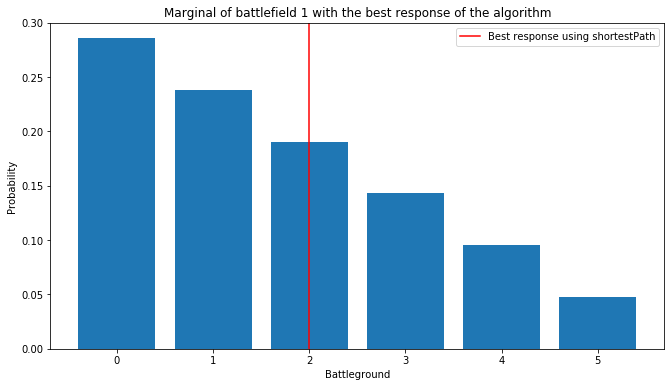

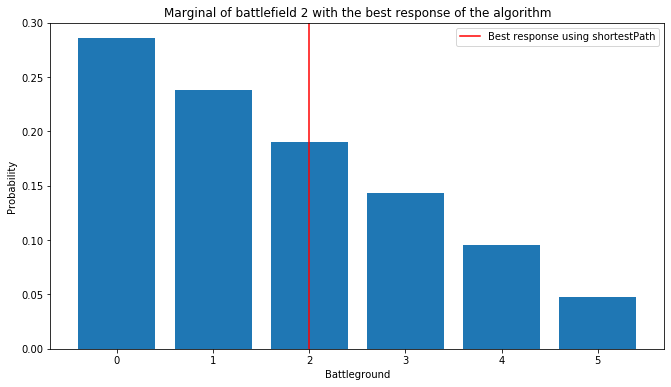

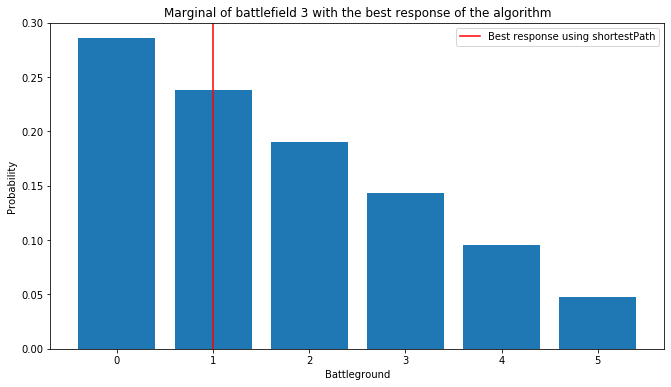

In [7]:
import matplotlib.pyplot as plt

# Constructing the instances

n,X,Y,V = [0]*6,[0]*6,[0]*6,[0]*6
n[1],X[1],Y[1],V[1] = 3,5,5,[1 for i in range (1,4)]
n[2],X[2],Y[2],V[2] = 3,1,5,[1 for i in range (1,4)]
n[3],X[3],Y[3],V[3] = 3,5,1,[1 for i in range (1,4)]
n[4],X[4],Y[4],V[4] = 6,12,12,[1 for i in range (1,7)]
n[5],X[5],Y[5],V[5] = 6,12,12,[i for i in range (1,7)]

# Constructing the distributions

Q = [[0]*6]*3
Q[1][1] = strat1(n[1],Y[1])
Q[1][2] = strat1(n[2],Y[2])
Q[1][3] = strat1(n[3],Y[3])
Q[1][4] = strat1(n[4],Y[4])
Q[1][5] = strat1(n[5],Y[5])
Q[2][1] = strat2(n[1],Y[1])
Q[2][2] = strat2(n[2],Y[2])
Q[2][3] = strat2(n[3],Y[3])
Q[2][4] = strat2(n[4],Y[4])
Q[2][5] = strat2(n[5],Y[5])

def plotMarginal(i,Prob,n,X,Y,V): # Probability of the allocation of troop on the battlefield i
    stratY = construct(Y,n)
    prob = []
    bins = [j for j in range(0, Y+1)]

    for k in range (0,Y+1):
        sumk = 0
        for j in range (0, len(stratY)):
            if (stratY[j][i-1] == k):
                sumk += Prob[j]
        prob += [sumk]

    tot = sum(prob)

    for e in prob:
        e = e/tot

    plt.figure(figsize=(11,6))
    plt.bar(bins,prob)
    sP = shortestPath(Prob,n,X,Y,V)
    plt.axvline(x=sP[i-1], label = "Best response using shortestPath", color = 'red')
    plt.title(f"Marginal of battlefield {i} with the best response of the algorithm")
    plt.xlabel("Battleground")
    plt.ylabel("Probability")
    plt.legend(loc = 'best')
    plt.show()

def plot(s,j):
    for k in range (0,n[j]):
        if (s == 1):
            plotMarginal(k+1,strat1(n[j],Y[j]),n[j],X[j],Y[j],V[j])
        if (s == 2):
            plotMarginal(k+1,strat2(n[j],Y[j]),n[j],X[j],Y[j],V[j])

s = 1
j = 1
plot(s,j)

## 3 Nash equilibrium in the Colonel Blotto game

##### Question 7:

There are at least three special cases of the game parameters for which the solution is trivial :

\begin{itemize}
\item (Case 1) There is $1$ battlefield. Then the maxmin solution for $A$ is $p_{[X]} = 1$.
\item (Case 2) There are $n-1$ battlefields worth $1$ and $1$ battlefield worth $n$, $X=Y$. Then the maxmin solution for $A$ is $p_{[0,...,0,X]} = 1$.
\item (Case 3) There are $n$ battlefields, $X=n(Y+1)$. Then the maxmin solution for $A$ is $p_{[Y+1,Y+1,...,Y+1]}=1$.
\end{itemize}

### 3.1 Naive linear program

##### Question 8:

The maxmin problem can be formulated as a linear program with an additional variable:

\begin{align*}
&\text{Considering the variables} && Z, (p_x)_{x \in \mathcal{X}} \\
&\text{Maximize} && Z \\
&\text{Subject to}  &&
\begin{cases}
\forall~q \in \Delta(\mathcal{Y}), \left(\sum\limits_{y \in \mathcal{Y}} q_y U(x, y)\right)^T_{x \in \mathcal{X}} \Big(p_x\Big)_{x \in \mathcal{X}} \geq Z \\
\forall~x \in \mathcal{X}, p_x \geq 0 \\
\sum\limits_{x \in \mathcal{X}} p_x = 1 \\
\end{cases}
\end{align*}

But then we would get an infinite number of constraints (because $\Delta(\mathcal{Y})$ is infinite).

Fortunately, the vector $\big(\sum\limits_{y \in \mathcal{Y}} q_y U(x, y)\big)_{x \in \mathcal{X}}$ can be re-written as $\sum\limits_{y \in \mathcal{Y}} q_y \big(U(x, y)\big)_{x \in \mathcal{X}}$, which is a barycenter of the vectors $\left(U(x, y)\right)_{x \in \mathcal{X}}$ for $y \in \mathcal{Y}$.

Hence we have:

\begin{align*}
\forall~q \in \Delta(\mathcal{Y}), \Big(\sum\limits_{y \in \mathcal{Y}} q_y U(x, y)\Big)^T_{x \in \mathcal{X}} \Big(p_x\Big)_{x \in \mathcal{X}} \geq Z &\iff \forall~q \in \Delta(\mathcal{Y}), \sum\limits_{y \in \mathcal{Y}} q_y \Big(U(x, y)\Big)^T_{x \in \mathcal{X}} \Big(p_x\Big)_{x \in \mathcal{X}} \geq Z \\
&\iff \forall~y \in \mathcal{Y}, \Big(U(x, y)\Big)^T_{x \in \mathcal{X}} \Big(p_x\Big)_{x \in \mathcal{X}} \geq Z
\end{align*}

We can thus formulate the maxmin problem as a linear program with a finite number of constraints:

\begin{align*}
&\text{Considering the variables} && Z, (p_x)_{x \in \mathcal{X}} \\
&\text{Maximize} && Z \\
&\text{Subject to}  &&
\begin{cases}
\forall~y \in \mathcal{Y}, Z + \Big(-U(x, y)\Big)^T_{x \in \mathcal{X}} \Big(p_x\Big)_{x \in \mathcal{X}} \leq 0 \\
\forall~x \in \mathcal{X}, p_x \geq 0 \\
\sum\limits_{x \in \mathcal{X}} p_x = 1 \\
\end{cases}
\end{align*}

The linear problem has $|\mathcal{X}|+1$ variables, and $|\mathcal{X}|+|\mathcal{Y}|+1$ constraints.

In [8]:
from scipy.optimize import linprog
from numpy import around # To round up errors of optimization

# n is the number of battlefields
# V is the array that contains the values of the n battlefields
# X, Y are the budgets of troops

# We first define the function that gives the payoff of a battlefield for A

def u(i,xi,yi,V):
    if (xi > yi):
        return V[i]
    elif (xi < yi):
        return -V[i]
    else:
        return 0

def NaiveLP(n,X,Y,V):
    stratX = construct(X,n)
    stratY = construct(Y,n)
    
    obj = [-1]+[0]*len(stratX) # Coefficients of the objective function
    
    lhs_ineq = [] # Left coefficients of the inequalities
    
    for y in stratY:
        lhsy = [1]
        for x in stratX:
            res = 0
            for i in range(0,n):
                res -= u(i,x[i],y[i],V)
            lhsy += [res]
        lhs_ineq += [lhsy]

    rhs_ineq = [0]*len(stratY) # Right coefficients of the inequalities
    lhs_eq = [[0]+[1]*len(stratX)] # Left coefficients of the equalities
    rhs_eq = [1] # Right coefficients of the equalities
    
    bnd = [(-float("inf"),float("inf"))] + [(0, float("inf"))]*len(stratX) # Bounds for the variables
    
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, 
                  bounds=bnd, method="revised simplex")
    
    p = list(around(opt.x[1:], decimals=2))
    
    print(f"The maxmin solution for A is given by the distribution {p} over {stratX}.")
    return

In [9]:
# Testing the NaiveLP on the special cases of Question 7

print("Case 1 :")
NaiveLP(1,3,3,[1])
print("")
print("Case 2 :")
NaiveLP(3,2,2,[1,1,3])
print("")
print("Case 3 :")
NaiveLP(2,6,2,[1,1])

Case 1 :
The maxmin solution for A is given by the distribution [1.0] over [[3]].

Case 2 :
The maxmin solution for A is given by the distribution [1.0, 0.0, 0.0, 0.0, 0.0, 0.0] over [[0, 0, 2], [0, 1, 1], [0, 2, 0], [1, 0, 1], [1, 1, 0], [2, 0, 0]].

Case 3 :
The maxmin solution for A is given by the distribution [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] over [[0, 6], [1, 5], [2, 4], [3, 3], [4, 2], [5, 1], [6, 0]].


Hence our algorithm gives the correct solutions on cases identified in Question 7.

In [10]:
# Testing the NaiveLP on the game instances of Question 6

print("Instance 1 :")
NaiveLP(3,5,5,[1,1,1])
print("")
print("Instance 2 :")
NaiveLP(3,1,5,[1,1,1])
print("")
print("Instance 3 :")
NaiveLP(3,5,1,[1,1,1])
#print("Instance 4 :")
#NaiveLP(6,12,12,[1,1,1,1,1,1])
#print("Instance 5 :")
#NaiveLP(6,12,12,[1,2,3,4,5,6])

# Not enough computational power to compute the NE on the last instances

Instance 1 :
The maxmin solution for A is given by the distribution [0.0, 0.0, 0.0, 0.17, 0.0, 0.0, 0.0, 0.17, 0.0, 0.17, 0.0, 0.17, 0.0, 0.0, 0.0, 0.0, 0.17, 0.17, -0.0, 0.0, 0.0] over [[0, 0, 5], [0, 1, 4], [0, 2, 3], [0, 3, 2], [0, 4, 1], [0, 5, 0], [1, 0, 4], [1, 1, 3], [1, 2, 2], [1, 3, 1], [1, 4, 0], [2, 0, 3], [2, 1, 2], [2, 2, 1], [2, 3, 0], [3, 0, 2], [3, 1, 1], [3, 2, 0], [4, 0, 1], [4, 1, 0], [5, 0, 0]].

Instance 2 :
The maxmin solution for A is given by the distribution [0.33, 0.33, 0.33] over [[0, 0, 1], [0, 1, 0], [1, 0, 0]].

Instance 3 :
The maxmin solution for A is given by the distribution [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33, 0.0, 0.0, 0.0, 0.33, 0.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] over [[0, 0, 5], [0, 1, 4], [0, 2, 3], [0, 3, 2], [0, 4, 1], [0, 5, 0], [1, 0, 4], [1, 1, 3], [1, 2, 2], [1, 3, 1], [1, 4, 0], [2, 0, 3], [2, 1, 2], [2, 2, 1], [2, 3, 0], [3, 0, 2], [3, 1, 1], [3, 2, 0], [4, 0, 1], [4, 1, 0], [5, 0, 0]].


For the instances 2 and 3, the pure strategies with non zero probabilities are best responses from Section 2.  
Hence our algorithm seems to give correct solutions.

### 3.3 A polynomial-size LP via a flow representation

##### Question 14:

A flow $f$ of size $1$ over our graph from the Question 4 can be considered as a probability flow.  
We denote by $E$ the edges of the graph. In this representation, the probability for $A$ to play $j$ troops on battlefield $i$ after having allocated $k$ troops to the previous battlefield would be the total flow entering the vertex $V(i,j,k)$:

\begin{align*}
&\mathbb{P}(V(1,j,0)) &&= f((s,V(1,j,0)) \text{ for } 0 \leq j \leq X \\
&\mathbb{P}(V(i,j,k)) &&= \sum\limits_{l = 0}^k  f((V(i-1,l,k-l),V(i,j,k))) \text{ for } 2 \leq i \leq n
\end{align*}

Knowing the probability of every possible play from $A$, we can switch roles and compute the expected payoff of $B$ when he plays $j$ troops on battlefield $i$:

\begin{equation*}
T_B[i][y_i] = - \sum\limits_{j = 0}^X \Big( \sum\limits_{k = 0}^{X-j} \mathbb{P}(V(i,j,k)) \Big) u_i(j,y_i)
\end{equation*}

Then with $P_B[i][j]$ being the maximum payoff that $B$ can get on the $i$ first battlefields with $j$ troops, we still have the following recurrence (same as in the dynamic programing section):

\begin{align*}
&P_B[0][j] &&= 0 ~\forall~ j \in \{0,...,Y\} \\
&P_B[i+1][j] &&= \text{max } \{ P_B[i][j-k] + T_B[i+1][k] ~|~ k \in \{0,...,j\}\} \\
\end{align*}

Our problem of maximizing the minimum payoff of $A$ is equivalent to minimizing the maximum payoff of $B$, that is to say $P_B[n][Y]$.

Hence the maxmin problem can be formulated as a linear program with an additional variable:

\begin{align*}
&\text{Considering the variables} && Z, (f(e))_{e \in E} \\
&\text{Minimize} && Z \\
&\text{Subject to}  &&
\begin{cases}
\forall~ j \in \{0,...,X\}, \mathbb{P}(V(1,j,0)) = f((s,V(1,j,0)) \\
\forall~ i \in \{2,...,n\}, \mathbb{P}(V(i,j,k)) = \sum\limits_{l = 0}^k  f((V(i-1,l,k-l),V(i,j,k))) \\
P_B[n][Y] \leq Z \\
\forall~ i \in \{1,...,n\}, \forall~ y_i \in \{0,...,Y\}, T_B[i][y_i] = - \sum\limits_{j = 0}^X \Big( \sum\limits_{k = 0}^{X-j} \mathbb{P}(V(i,j,k)) \Big) u_i(j,y_i) \\
\forall~ j \in \{0,...,Y\}, P_B[0][j] = 0 \\
\forall~ i \in \{0,...,n-1\}, \forall~ j \in \{0,...,Y\}, \forall~ k \in \{0,...,j\}, P_B[i+1][j] \geq P_B[i][j-k] + T_B[i+1][k] \\
\forall~ e \in E, f(e) \geq 0 \\
\text{for all vertices of the graph, the flow conservation constraint} 
\end{cases}
\end{align*}

The linear problem has $O(nX^2)$ variables, and $O(nX^2 + nY^2)$ constraints.  
Hence it is a polynomial-size LP.

##### Question 15:

Let $f$ be a flow of size $1$.  
The idea to compute a mixed strategy corresponding to this flow is to break down the flow $f$ into a sum of paths $(\mathcal{P}_x)_{(x \in \mathcal{I})}$, with each path $\mathcal{P}_x$ corresponding to a pure strategy $x$. The mixed strategy $p$ will be the distribution that allocates the flow running through $\mathcal{P}_x$ as probability of the pure strategy $x$.

To do so, we can take any path that is a succession of edges with a non zero flow, compute the minimum flow running through its edges, and substract that value from all the edges. This value is the flow of the path, and after substracting it the path no longer exists. As long as there is a path, we can repeat this operation, until there is no flow anymore.

---
**Algorithm 4:** FlowToStrat($f$): An algorithm that computes a mixed strategy from a flow of size $1$.

---
**Input:** A flow $f$ of size $1$ on the graph introduced in Question 4.  
**Output:** A mixed strategy $p$ corresponding to the flow.  
Let $p$ be a set of size $|\mathcal{X}|$;  
**for** $x \in \mathcal{X}$ **do**  
> Let $\mathcal{P}_x$ be the path corresponding to $x$;  
  $p_x \leftarrow \text{min}\{f(e) ~|~ e \in \mathcal{P}_x\}$;  
  **for** $e \in \mathcal{P}_x$ **do**  
  >> $f(e) \leftarrow f(e)-p_x$;  

**return** $p$;

Since the loops are running on finite sets, this algorithm obviously terminates. At each iteration of the first loop, we consider the path $\mathcal{P}_x$ corresponding to $x$. If the flow running through the path is zero (i. e. there is at least one edge of the path for which $f(e) = 0$), nothing is done. If a strictly positive flow is running through a path, we substract this flow from the path and assign its value to the probability of the pure strategy $x$.

Since we do this on every path, we end up having no more flow in the graph. Since the size of the total flow is $1$, the sum of the flows of the paths also is $1$, hence $p$ is a probability distribution over $\mathcal{X}$.

Everytime that there is a $p_x > 0$, we set the value of the flow of an edge to zero. Since there are only $O(nX^2)$ edges in our graph and that they cannot be set to zero twice, the number of pure strategies contained in the support of the mixed strategy is $O(nX^2)$.

## 4 Extensions to multiple resource types

##### Question 18:

Here is an exemple of an utility function for the extension of the Colonel Blotto game. Let's assume that there are now $k$ different resources, and that each player has a limited number $X_l$ of the resource $l$. The allocation on the battleground $i$ of the resource $l$ is denoted $x_i^l$ for $A$ (and $y_i^l$ for $B$).

The payoff of $A$ on the battleground $i$ is $u_i(x^1_i, y^1_i, ..., x^k_i, y^k_i) = \sum\limits_{l=1}^k u_i^l(x^l_i, y^l_i)$ where $u_i^l$ are functions similar to our previous $u_i$, with values $v_i^l$ for the battlefield $i$ and the resource $l$. The total payoff of $A$ is then $U(x^1,y^1,...,x^k,y^k) = \sum\limits_{i = 1}^n u_i(x^1_i, y^1_i, ..., x^k_i, y^k_i)$.

An important characteristic of the utility function to be able to solve the game is that it stays only dependent of which player has more resources of each type, and not of how much resources they have in absolute.

##### Question 19:

For the problem of finding a best response through shortest paths in a graph, we can do exactly as we did in Questions 4 and 5 just by creating vertices for all combinations of resource quantities.